# Data Description

In [110]:
# Importing the libraries
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [111]:
df=pd.read_csv('AbaloneCaseStudy.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [112]:
df.shape

(4177, 9)

In [113]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [114]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])

df['Sex'].value_counts   # 0 for female, 1 for Infants, 2 for Male 

<bound method IndexOpsMixin.value_counts of 0       2
1       2
2       0
3       2
4       1
5       1
6       0
7       0
8       2
9       0
10      0
11      2
12      2
13      0
14      0
15      2
16      1
17      0
18      2
19      2
20      2
21      1
22      0
23      0
24      0
25      0
26      0
27      2
28      2
29      2
       ..
4147    2
4148    2
4149    1
4150    1
4151    1
4152    1
4153    1
4154    1
4155    1
4156    2
4157    2
4158    1
4159    0
4160    0
4161    0
4162    2
4163    1
4164    1
4165    1
4166    1
4167    2
4168    0
4169    2
4170    2
4171    2
4172    0
4173    2
4174    2
4175    0
4176    2
Name: Sex, Length: 4177, dtype: int32>

In [115]:
df.head(20)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,1,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,0,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,0,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,2,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,0,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [116]:
#Checking the null values in dataset
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [117]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


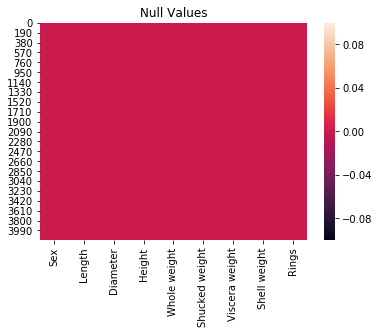

In [118]:
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

There are no null values in dataset

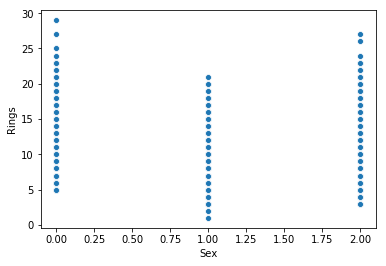

In [119]:
import seaborn as sns
sns.scatterplot(x="Sex",y="Rings",data=df)

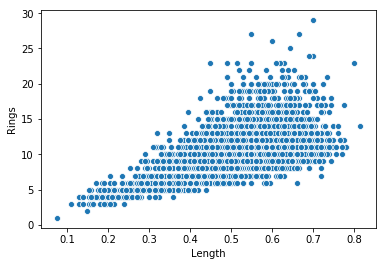

In [120]:

sns.scatterplot(x="Length",y="Rings",data=df)

In [121]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

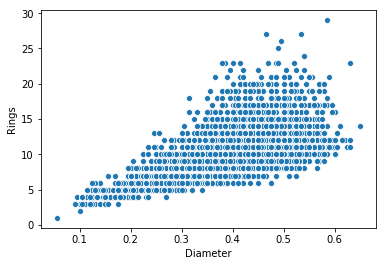

In [122]:
sns.scatterplot(x="Diameter",y="Rings",data=df)

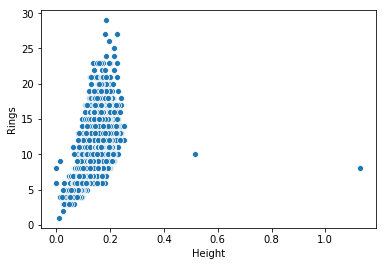

In [123]:
sns.scatterplot(x="Height",y="Rings",data=df)

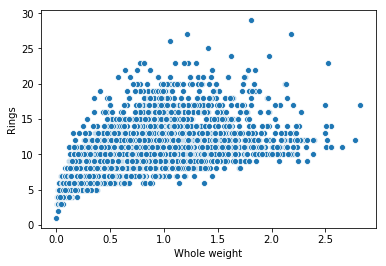

In [124]:
sns.scatterplot(x="Whole weight",y="Rings",data=df)

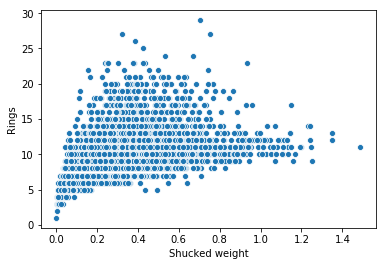

In [125]:
sns.scatterplot(x="Shucked weight",y="Rings",data=df)

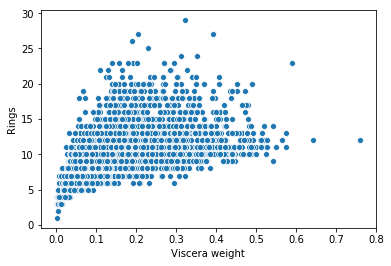

In [126]:
sns.scatterplot(x="Viscera weight",y="Rings",data=df)

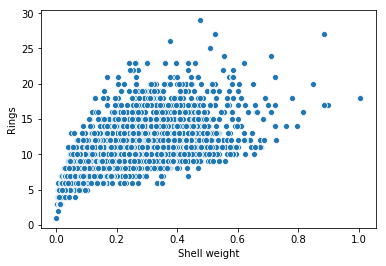

In [127]:
sns.scatterplot(x="Shell weight",y="Rings",data=df)

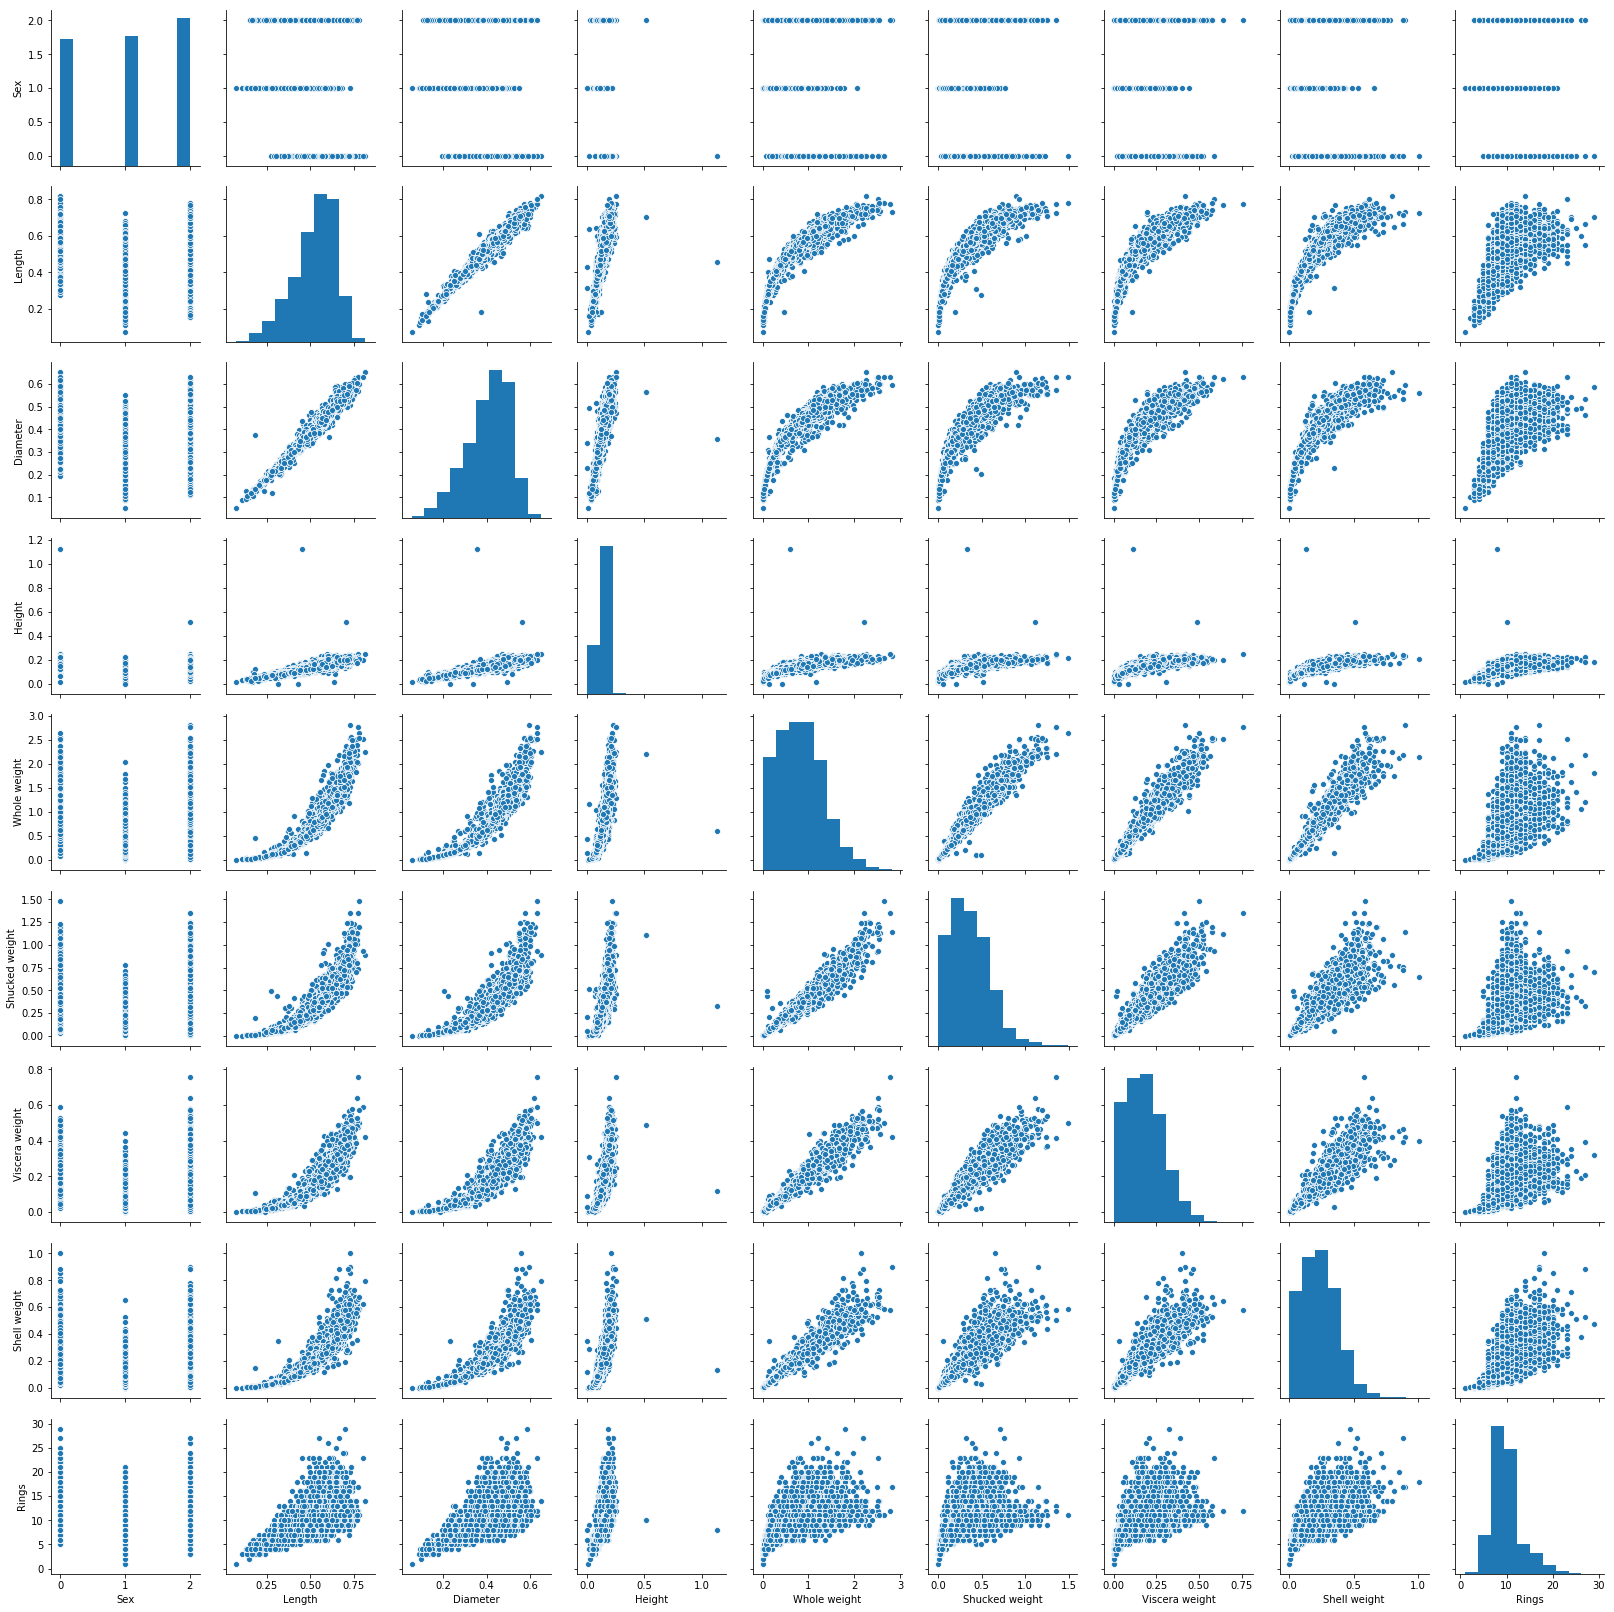

In [128]:
sns.pairplot(df)

In [129]:
#Correlation
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


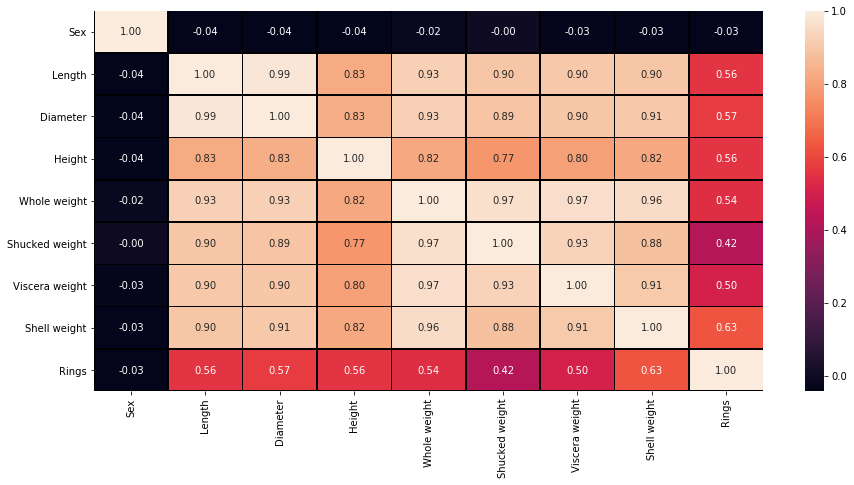

In [130]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor="black",fmt='0.2f')

# Checking for Outliers

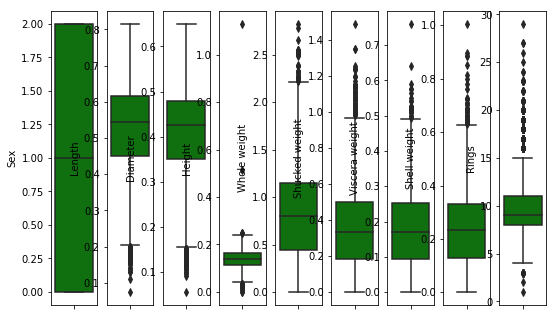

In [131]:
collist=df.columns
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')

# Skewness

In [132]:
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

Skewness is there in data

# Normal Distribution Curve

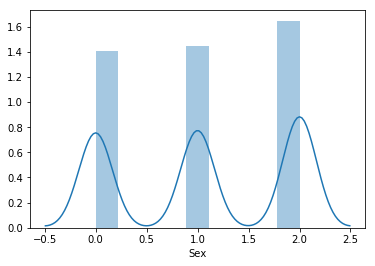

In [133]:
col=df.columns
sns.distplot(df[col[0]])

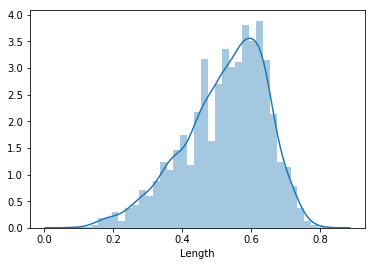

In [134]:
sns.distplot(df[col[1]])

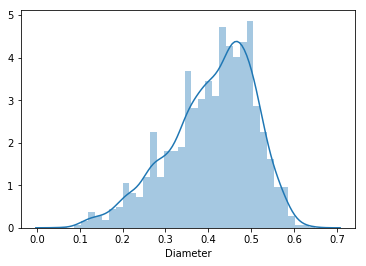

In [135]:
sns.distplot(df[col[2]])

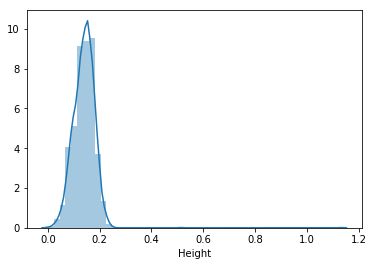

In [136]:
sns.distplot(df[col[3]])

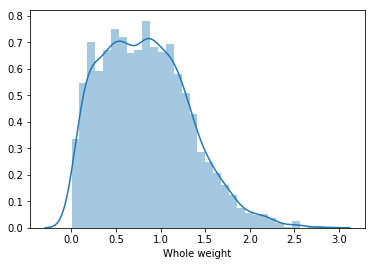

In [137]:
sns.distplot(df[col[4]])

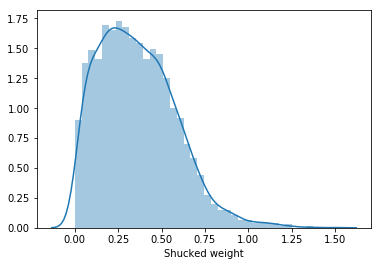

In [138]:
sns.distplot(df[col[5]])

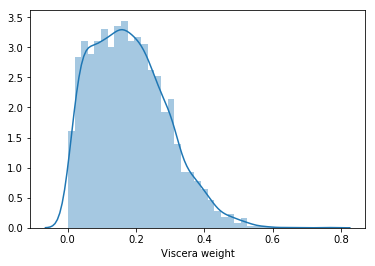

In [139]:
sns.distplot(df[col[6]])

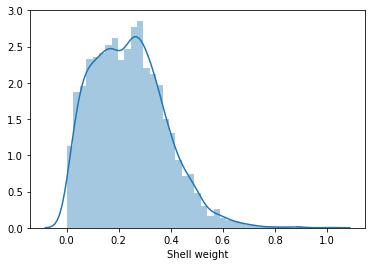

In [140]:
sns.distplot(df[col[7]])

Through Normal Distribution it can be said there is some skewness in data

# Removing Outliers

In [141]:
# z score technique
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(4177, 9)

threshold=3
print(np.where(z>3))

In [142]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(4177, 9)
(4027, 9)


# Percentage Data Loss


In [143]:
loss_percent=((4177-4027)/4177)*100
loss_percent

3.5910940866650707

# Splitting independent and target variables in x and y

In [144]:
x=df_new.drop("Rings",axis=1)
y=df_new["Rings"]

In [145]:
#checking skewness again
x.skew()

Sex              -0.094886
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
dtype: float64

We consider skewness to be +/- 0.65 so we see there is no more skewness is there

# Finding Best Random State

In [146]:
from sklearn.linear_model import LinearRegression
maxScore=0
maxRs=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    predlm=lm.predict(x_test)
    sc=lm.score(x_train,y_train)
    if sc>maxScore:
        maxScore=sc
        maxRs=i
print("Best Accuracy is ", maxScore,"on Random_State",maxRs)

Best Accuracy is  0.5310646852178886 on Random_State 53


In [147]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.20,random_state=53)

In [148]:
x_train.shape

(3221, 8)

In [149]:
y_train.shape

(3221,)

In [150]:
x_test.shape

(806, 8)

In [151]:
y_test.shape

(806,)

In [152]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [153]:
lm.coef_

array([  0.10584492,  -1.31905906,  11.44385699,  20.27138258,
         7.24106725, -18.45496948,  -6.29949546,   8.86710827])

In [154]:
lm.intercept_

2.5914286104525646

In [155]:
lm.score(x_train,y_train)

0.5310646852178886

In [156]:
#predict the value
pred=lm.predict(x_test)
print("Predicted Rings:",pred)
print("Actual Rings",y_test)

Predicted Rings: [ 7.17659553 10.83183755  9.49937514 10.4713588   7.57436311  9.32949817
 11.62675196 12.12405703 12.60641943  6.48246971 11.09098083  8.93015766
 11.22247359  9.16545827 14.9267921  13.07140922  9.26921113 12.55984189
  7.80327216  9.72463256  8.02051923 10.04179842 11.74236725 12.67459013
 10.38136334  8.58907856  9.45079887  6.65412672  9.28878534  9.05494976
  8.37235777 11.11847067 11.29128252 10.78874148  6.0410788   9.25524739
 10.50936653  9.24139773 10.45357331 10.23300345  9.65672982 10.06647021
 11.456693   10.29778633 11.6270667  10.28213147 10.59347058  9.46248728
 10.22160803  5.18584459 11.45013756  9.27153569 12.88289951 10.72454241
  9.82070397 11.45353328  8.45219676 10.19949239  7.16882933 11.28291405
  9.37347384 11.67701434  8.33882002  8.64491094 11.67278644  7.97000983
  9.07262662  8.56558624  5.73375318 11.16198046  7.91119877 13.76801349
 11.97520179 11.48122652 11.72902551 13.2698452  13.51576401 10.92047311
 12.0928599   9.58419754  8.902388

In [157]:
print('error:')

print('Mean Absolute error: ',mean_absolute_error(y_test,pred))

print('Mean Squared error: ',mean_squared_error(y_test,pred))

print('Root Mean Squared error: ',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean Absolute error:  1.4962162212970627
Mean Squared error:  4.054860219335758
Root Mean Squared error:  2.0136683488935705


In [158]:
#r2 score --> coefficient of determination
#is the proportion of the variance in the dependent variable that is predictable from the independent variable(s)
#i.e. change coming in y whenever x is being changed
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.4222072444013155


In [159]:
import joblib
joblib.dump(lm,"AbaloneCaseStudy.obj")

['AbaloneCaseStudy.obj']